In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data:
df = pd.read_csv('laptop_clean.csv')
df.head(5)

,id,brand,cpu,cpu_GHz,cpu_brand,ram,scrsize,gpu,gpu_brand,memory,drive_type,opersystem,weight,since,shop,price,url
0,0,ACER,Intel i7,4.6,Intel,8,15.6,NVIDIA GeForce RTX,NVIDIA,512,SDD,Window,2.2,2021,FPTShop,29999000,https://fptshop.com.vn/may-tinh-xach-tay/acer-...
1,1,MSI,Intel i5,4.5,Intel,8,14.0,Intel Iris,Intel,512,SDD,Window,1.3,2021,FPTShop,18799000,https://fptshop.com.vn/may-tinh-xach-tay/msi-m...
2,2,DELL,Intel i3,4.1,Intel,4,15.6,Intel UHD,Intel,256,SDD,Window,1.7,2021,FPTShop,15299000,https://fptshop.com.vn/may-tinh-xach-tay/dell-...
3,3,DELL,Intel i3,4.1,Intel,8,15.6,Intel UHD,Intel,256,SDD,Window,2.0,2021,FPTShop,15599000,https://fptshop.com.vn/may-tinh-xach-tay/dell-...
4,4,DELL,Intel i5,4.2,Intel,4,15.6,Intel Iris,Intel,512,SDD,Window,1.7,2021,FPTShop,19999000,https://fptshop.com.vn/may-tinh-xach-tay/dell-...


In [3]:
# Phân loại biến định tính:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Có {} biến định tính.'.format(len(categorical)))
print('Các biến định tính là :', categorical)
print('_'*20)

# Phân loại biến định lượng:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Có {} biến định lượng.'.format(len(numerical)))
print('Các biến định lượng là :', numerical)

Có 9 biến định tính.
Các biến định tính là : ['brand', 'cpu', 'cpu_brand', 'gpu', 'gpu_brand', 'drive_type', 'opersystem', 'shop', 'url']
____________________
Có 8 biến định lượng.
Các biến định lượng là : ['id', 'cpu_GHz', 'ram', 'scrsize', 'memory', 'weight', 'since', 'price']


In [4]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [5]:
import statsmodels.api as sm
#Hàm trực quan hóa dữ liệu
def vis(data):
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (6,3))
    sns.distplot(data, ax=axes[0], color='green')
    plt.tight_layout()
    
    sm.qqplot(data,ax=axes[1], line='45')
    plt.tight_layout()
    fig.suptitle(data.name, size=18)

#Hàm chuẩn hóa    
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std  

In [6]:
# Hàm kiểm định Shapiro và đồ thị phân phối
from scipy.stats import shapiro
import statsmodels.api as sm
def shapiro_test(data):
    stat, p = shapiro(data)
    print('Kiểm định Shapiro cho',data.name)
    print('stat=%.3f, p=%.6f' % (stat, p))
    if p < 0.05:
        print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        print('Đủ điều kiện để phân tích tiếp')
    else:
        print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('-'*50)

# Dùng kiểm định Anova để so sánh Giá giữa các Cửa hàng phân phối (shop)

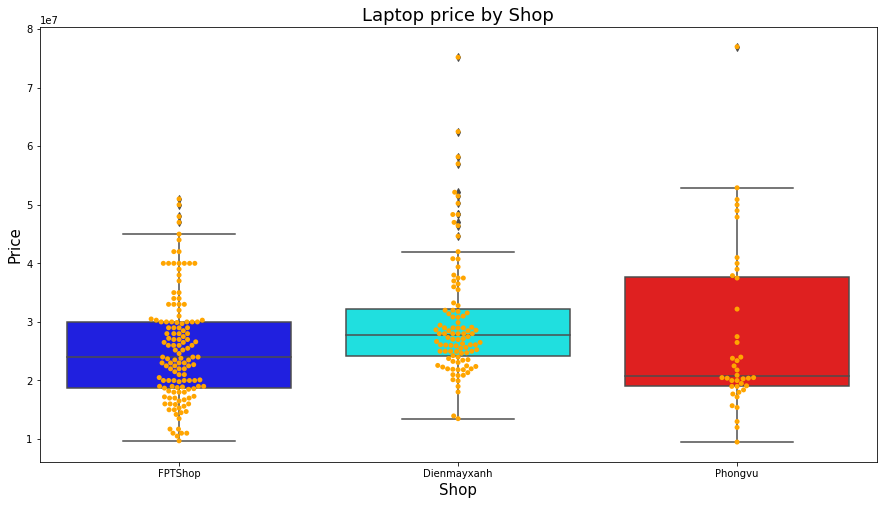

In [7]:
plt.figure(figsize=(15,8))
g=sns.boxplot(x='shop', y='price', data=df, palette=['blue','cyan','red'])
sns.swarmplot(x="shop", y="price", data=df, color='orange')
plt.title('Laptop price by Shop', size=18)
plt.xlabel('Shop',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [8]:
shop = df[['shop','price']]
g = df['price']
grp = shop.groupby('shop').groups
fpt = g[grp['FPTShop']]
fpt.name='FPTShop'
pv = g[grp['Phongvu']]
pv.name='Phongvu'
dmx = g[grp['Dienmayxanh']]
dmx.name='Dienmayxanh'

In [9]:
# Lấy mẫu (n=30) và chuẩn hóa:
fpt=standadize(fpt)
dmx=standadize(dmx)
pv=standadize(pv)

#### Sử dụng Shapiro-Wilk test để kiểm tra Phân phối của dữ liệu 

Phát biểu giả thiết:

$H_0$: Phân phối của nhóm là chuẩn

$H_1$: Phân phối của nhóm là không chuẩn

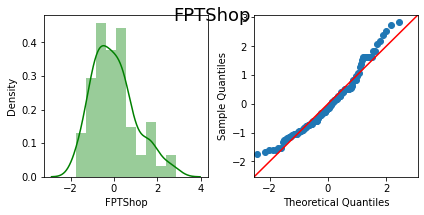

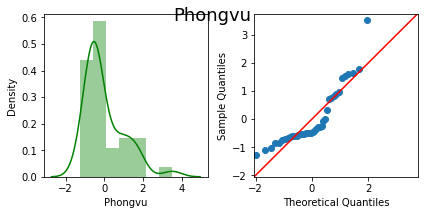

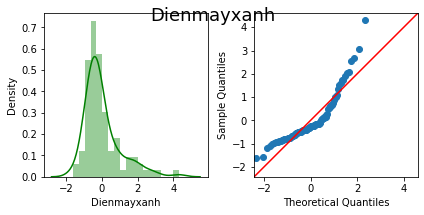

In [10]:
vis(fpt)
vis(pv)
vis(dmx)

In [11]:
shapiro_test(fpt)
shapiro_test(pv)
shapiro_test(dmx)

Kiểm định Shapiro cho FPTShop
stat=0.959, p=0.000531
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------
Kiểm định Shapiro cho Phongvu
stat=0.831, p=0.000032
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------
Kiểm định Shapiro cho Dienmayxanh
stat=0.843, p=0.000000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


#### Kiểm định tính thuần nhất phương sai (Bartlett’s Test)

Phát biểu các giả thiết:

$H_0$: Các nhóm đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 nhóm có phương sai khác nhau (lớn)

In [12]:
from scipy.stats import bartlett
bartlett = bartlett(fpt,dmx,pv)
print(bartlett)
if bartlett.pvalue > 0.05:
    print('Không thể bác bỏ giả thiết H0: Các nhóm đồng nhất về phương sai')
else:
    print('Các nhóm không đồng nhất về phương sai')

BartlettResult(statistic=0.004815074822490079, pvalue=0.9975953583825714)
Không thể bác bỏ giả thiết H0: Các nhóm đồng nhất về phương sai


### Kiểm định ANOVA

Phát biểu giả thiết:

- $H_0$: `Giá sản phẩm (price)` giữa các `Cửa hàng (shop)` không có sự khác biệt
- $H_1$: `Giá sản phẩm (price)` giữa các `Cửa hàng (shop)` có sự khác biệt

In [13]:
# Tiến hành phân tích ANOVA 1 chiều
from scipy.stats import f_oneway
anova = f_oneway(fpt,dmx,pv)
print(anova)
alpha = 0.05
if (anova.pvalue < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng Giá sản phẩm (price) giữa các Cửa hàng (shop) có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng:\n Giá sản phẩm (price) giữa các Cửa hàng (shop) không có sự khác biệt.')

F_onewayResult(statistic=1.0285388739512266e-30, pvalue=1.0)
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng:
 Giá sản phẩm (price) giữa các Cửa hàng (shop) không có sự khác biệt.


***Kết luận:*** Về mặt thống kê, `Giá sản phẩm (price)` giữa các `Cửa hàng (shop)` không có sự khác biệt với mức ý nghĩa 5%.

   - **Giữa các cửa hàng phân phối không có sự khác biệt quá lớn về giá cả.**
   - **Không có sự độc quyền về giá ở thị trường laptop**
   - **Nếu sản phẩm laptop mà bạn mong muốn bị hết hàng hoặc không có ở shop này\
   bạn có thể tìm kiếm ở shop khác mà vẫn yên tâm về giá cả**

---
# Phân tích mối quan hệ giữa các biến

## Ma trận hệ số tương quan

In [14]:
df =df.sort_values(by='price')
corr = df[numerical].corr(method = "pearson")
corr

,id,cpu_GHz,ram,scrsize,memory,weight,since,price
id,1.000000,-0.411241,0.047324,-0.113216,0.275464,-0.170441,-0.212669,-0.020470
cpu_GHz,-0.411241,1.000000,0.093140,0.016351,-0.315072,-0.001243,0.084166,0.135903
ram,0.047324,0.093140,1.000000,-0.029363,0.409429,-0.048001,0.063276,0.783801
scrsize,-0.113216,0.016351,-0.029363,1.000000,0.170599,0.755016,0.303132,0.037228
memory,0.275464,-0.315072,0.409429,0.170599,1.000000,0.216019,0.285916,0.399240
weight,-0.170441,-0.001243,-0.048001,0.755016,0.216019,1.000000,0.291478,0.030639
since,-0.212669,0.084166,0.063276,0.303132,0.285916,0.291478,1.000000,0.020238
price,-0.020470,0.135903,0.783801,0.037228,0.399240,0.030639,0.020238,1.000000


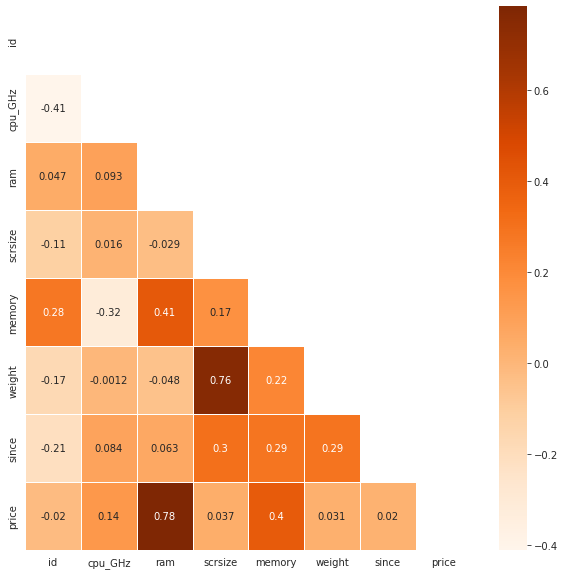

In [15]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax=sns.heatmap(corr, annot=True, mask=mask, cmap='Oranges', linewidths=0.5, linecolor='white')

**Ta có 2 giả thuyết**
- `RAM` là yếu tố ảnh hưởng rất lớn đến `Giá sản phẩm (price)` (tỷ lệ thuận)
- Giữa 'Kích thước màn hình (scrsize)` và ` Trọng lượng (weight)` có mối liên hệ với nhau ( tỷ lệ thuận )

***Sử dụng kiểm định Chisquare để kiểm định 2 giả thuyết trên***

---
## Chisquare

In [17]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

**Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của `RAM (ram)` đến `Giá sản phẩm (price)`.**

Phát biểu giả thiết:

- $H_0$: biến `RAM (ram)` biến `Giá sản phẩm (price)` là 2 biến độc lập.
- $H_1$: biến `RAM (ram)` ảnh hưởng đến biến `Giá sản phẩm (price)` .


In [18]:
df['ram'].value_counts()

8     171
16     77
4      22
32      3
Name: ram, dtype: int64

Vì chỉ có 3 sản phẩm laptop có RAM 32GB nên\
chúng ta sẽ label chung với những laptop có ram 16GB thành `16GB trở lên`

In [19]:
bins = [0, 5, 10, 40]
bins1 = [0, 20000001 , 30000001 , 100000000]
new = df[['ram','price']]
new['ram'] = pd.cut(new['ram'], bins, labels = ['4GB', '8GB', '16GB trở lên'])
new['price_n'] = pd.cut(new['price'], bins1, labels = ['dưới 20tr', '20-30tr', 'trên 30tr'])
new

,ram,price,price_n
260,4GB,9490000,dưới 20tr
132,4GB,9699000,dưới 20tr
131,4GB,10499000,dưới 20tr
14,4GB,10999000,dưới 20tr
130,4GB,10999000,dưới 20tr
...,...,...,...
150,16GB trở lên,56990000,trên 30tr
149,16GB trở lên,58190000,trên 30tr
148,16GB trở lên,62490000,trên 30tr
146,16GB trở lên,75190000,trên 30tr


In [20]:
ram = pd.crosstab(index=new['ram'], columns=new['price_n'])
ram

price_n,dưới 20tr,20-30tr,trên 30tr
ram,,,
4GB,21,1,0
8GB,43,108,20
16GB trở lên,2,22,56


Text(0, 0.5, '')

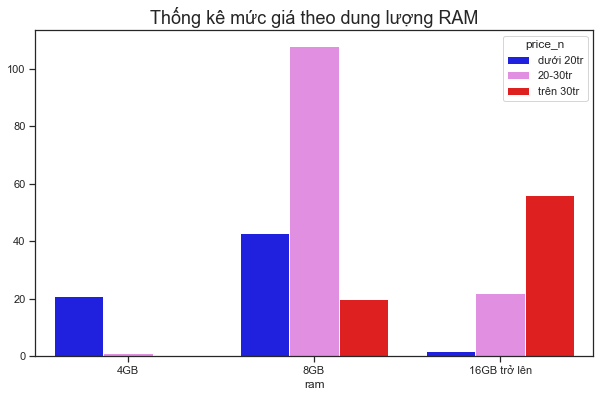

In [21]:
a=pd.DataFrame(new[new['ram']=='4GB'][['ram','price_n']].value_counts())
plot=a.reset_index()
a=pd.DataFrame(new[new['ram']=='8GB'][['ram','price_n']].value_counts()).reset_index()
plot=pd.concat([plot,a])
a=pd.DataFrame(new[new['ram']=='16GB trở lên'][['ram','price_n']].value_counts()).reset_index()
plt.figure(figsize=(10,6))
plot=pd.concat([plot,a])
sns.barplot(x="ram", y=plot[0], hue="price_n", data=plot,palette=['blue','violet','red'])
plt.title('Thống kê mức giá theo dung lượng RAM', size=18)
plt.ylabel('')

In [22]:
from scipy import stats as st # Kiểm định thống kê
score, p_value, dof, expected = st.chi2_contingency(ram)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,158.912558,2.501131e-33,4,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, `Dung lượng RAM (ram)` ảnh hưởng đến biến `Giá sản phẩm (price)` . với mức ý nghĩa 5%.

> Điều này chứng tỏ: Laptop càng nhiều dung lượng RAM sẽ có giá thành càng cao.

---
**Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của `Kích thước (scrsize)` đến `Cân nặng (weight)`.**

Phát biểu giả thiết:

- $H_0$: biến `Kích thước màn hình (scrsize)` biến `Cân nặng (weight)` là 2 biến độc lập.
- $H_1$: biến `Kích thước màn hình (scrsize)` ảnh hưởng đến biến `Cân nặng (weight)` .


In [23]:
bins = [0, 13.9, 14.5, 20]
bins1 = [0, 1.49 , 1.8 , 10]
new = df[['weight','scrsize']]
new['scrsize_n'] = pd.cut(new['scrsize'], bins, labels = ['<14inch', '14inch', '>14inch'])
new['weight_n'] = pd.cut(new['weight'], bins1, labels = ['light', 'normal', 'heavy'])
new

,weight,scrsize,scrsize_n,weight_n
260,1.2,11.6,<14inch,light
132,1.4,11.6,<14inch,light
131,1.4,11.6,<14inch,light
14,1.7,15.6,>14inch,normal
130,1.7,15.6,>14inch,normal
...,...,...,...,...
150,1.3,13.4,<14inch,light
149,2.4,15.6,>14inch,heavy
148,2.1,15.6,>14inch,heavy
146,2.4,15.6,>14inch,heavy


In [24]:
kg_inch = pd.crosstab(index=new['scrsize_n'], columns=new['weight_n'])
kg_inch

weight_n,light,normal,heavy
scrsize_n,,,
<14inch,40,0,0
14inch,46,27,2
>14inch,6,54,98


Text(0, 0.5, '')

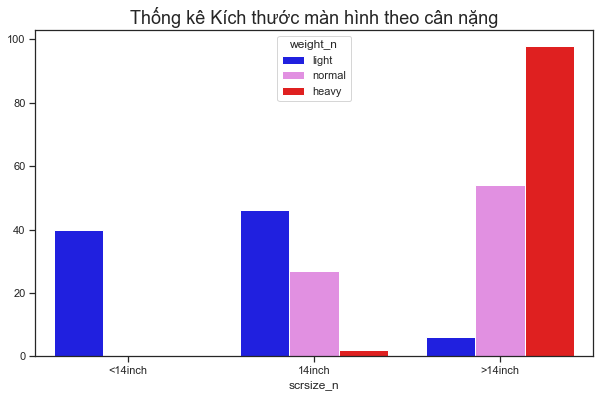

In [25]:
a=pd.DataFrame(new[new['scrsize_n']=='<14inch'][['scrsize_n','weight_n']].value_counts())
plot=a.reset_index()
a=pd.DataFrame(new[new['scrsize_n']=='14inch'][['scrsize_n','weight_n']].value_counts()).reset_index()
plot=pd.concat([plot,a])
a=pd.DataFrame(new[new['scrsize_n']=='>14inch'][['scrsize_n','weight_n']].value_counts()).reset_index()
plt.figure(figsize=(10,6))
plot=pd.concat([plot,a])
sns.barplot(x="scrsize_n", y=plot[0], hue="weight_n", data=plot,palette=['blue','violet','red'])
plt.title('Thống kê Kích thước màn hình theo cân nặng', size=18)
plt.ylabel('')

In [26]:
from scipy import stats as st # Kiểm định thống kê
score, p_value, dof, expected = st.chi2_contingency(kg_inch)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,191.14243,3.011594e-40,4,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, biến `Kích thước màn hình (scrsize)` ảnh hưởng đến biến `Cân nặng (weight)` . với mức ý nghĩa 5%.
> Điều này chứng tỏ Kích thước màn hình càng lớn, thì laptop càng nặng